### *Membres du groupe : DIOUF Tamsir Ababacar, NLEND Marie Flora & SAKPLETO Yao Emmanuel*

# **Projet : Admission aux urgences**

Pour ce projet, nous avons eu une base de données d'environ 32000 lignes sur les admissions des patients aux urgences. La base de données est constituée de diverses colonnes allant de la date d'admission, l'age des patients, les raisons de l'admission aux diagnotiques posés et bien d'autres. Nous avons étudier cette base de données dans le but de régler une parmis les deux problématique que nous avions en tete. Il s'agit de :
- Prédire les maladies en fonctions des périodes afin de permettre au personnel médical de mieux appréhender certains cas.
- Identifier les patients similaires pour comprendre les tendances aux urgences. 

Une analyse poussée de nos données nous a permis plus tard de faire un choix parmis ces deux thématiques (à voir et comprendre plus tard dans le notebook). C'est ainsi que nous nous sommes tournés vers **l'identification des patients similaires afin de comprendre les tendances dans les urgences**

## 1. Import des Bibliothèques et Données

**Description** : Chargement des bibliothèques et du fichier Excel.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Replace the file path with the correct path to your Excel file
df = pd.read_excel(r"C:\Documents1\Mobilité S6\Intelligence Artificielle\TP\TP Cas Hopital\2020 09 14 - Admission Urgences.xlsx")

## 2. Visualisation de la Base de  Données

**Description** : Apercevoir les premières lignes et étudier la structure de la base de données

In [66]:
df.head()

,PATIENT ID,DEPARTEMENT,DATE ADMISSION,CATEGORIE,GENRE,ASSURANCE,AGE (année),AGE (mois),CAUSE CONSULTATION,MECANISME,ORIGINE,LIEU,DIAGNOSTIC CODE CM-10,DIAGNOSTIC,HOSPITALISATION
0,15846,Pédiatrie,2017-11-01 00:00:01,C2,F,D,0.0,6.0,Maladie,Autre,Spontanée,Autre,R104,Douleur abdominale et pelvienne,0
1,15847,Pédiatrie,2017-11-01 00:02:03,C2,M,B,0.0,7.0,Maladie,Autre,Spontanée,Autre,K522,Colites non-infectieuses,0
2,15848,Pédiatrie,2017-11-01 00:08:31,C4,M,B,1.0,10.0,Maladie,Autre,Spontanée,Autre,B09,Verrues,0
3,15849,Traumatologie,2017-11-01 00:10:21,C4,M,A,6.0,8.0,Accident,Chute,Spontanée,Espace public,S52,Fracture de l'avant-bras,0
4,15850,Pédiatrie,2017-11-01 00:12:27,C2,F,D,0.0,7.0,Maladie,Autre,Autre hôpital privé,Autre,K21,Reflux gastro-oesophagien,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32024 entries, 0 to 32023
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PATIENT ID             32024 non-null  int64  
 1   DEPARTEMENT            32024 non-null  object 
 2   DATE ADMISSION         32024 non-null  object 
 3   CATEGORIE              31907 non-null  object 
 4   GENRE                  32024 non-null  object 
 5   ASSURANCE              32024 non-null  object 
 6   AGE (année)            32023 non-null  float64
 7   AGE (mois)             32023 non-null  float64
 8   CAUSE CONSULTATION     32024 non-null  object 
 9   MECANISME              32024 non-null  object 
 10  ORIGINE                32024 non-null  object 
 11  LIEU                   32024 non-null  object 
 12  DIAGNOSTIC CODE CM-10  32024 non-null  object 
 13  DIAGNOSTIC             32024 non-null  object 
 14  HOSPITALISATION        32024 non-null  int64  
dtypes:

In [68]:
df.shape

(32024, 15)

## 3. Prétraitement des Données

**Description** : Nettoyer les données en gérant les valeurs manquantes, les âges négatifs, et en convertissant les formats.

**Données** : DataFrame avec 32 023 lignes et 15 colonnes (PATIENT ID, DEPARTEMENT, DATE ADMISSION, CATEGORIE, GENRE, ASSURANCE, AGE (année), AGE (mois), CAUSE CONSULTATION, MECANISME, ORIGINE, LIEU, DIAGNOSTIC CODE CM-10, DIAGNOSTIC, HOSPITALISATION).

- Remplaçons d'abord les valeurs manquantes dans "CATEGORIE" par "Inconnu"

In [69]:
df['CATEGORIE'] = df['CATEGORIE'].fillna('Inconnu')

- Nous avons une valeur manquante dans "AGE (année)" et une autre dans "AGE (mois)", elles seront remplacées par la moyenne.

In [70]:
mean_age_annee = df['AGE (année)'].mean()
mean_age_mois = df['AGE (mois)'].mean()
df['AGE (année)'] = df['AGE (année)'].fillna(mean_age_annee)
df['AGE (mois)'] = df['AGE (mois)'].fillna(mean_age_mois)

In [71]:
df.isnull().sum()  # Vérifie le nombre de valeurs manquantes par colonne
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

Valeurs manquantes par colonne :
 PATIENT ID               0
DEPARTEMENT              0
DATE ADMISSION           0
CATEGORIE                0
GENRE                    0
ASSURANCE                0
AGE (année)              0
AGE (mois)               0
CAUSE CONSULTATION       0
MECANISME                0
ORIGINE                  0
LIEU                     0
DIAGNOSTIC CODE CM-10    0
DIAGNOSTIC               0
HOSPITALISATION          0
dtype: int64


- Nous n'avons plus de valeurs manquantes, nous allons à présent étudier les différentes distributions. 

In [72]:
# Statistiques descriptives des colonnes numériques sans "PATIENT ID"
print(df.drop("PATIENT ID", axis=1).describe())

        AGE (année)    AGE (mois)  HOSPITALISATION
count  32024.000000  32024.000000     32024.000000
mean       5.170471      5.430753         0.039408
std        7.132484      3.446833         0.194567
min     -995.000000     -7.000000         0.000000
25%        1.000000      2.000000         0.000000
50%        4.000000      5.000000         0.000000
75%        9.000000      8.000000         0.000000
max       28.000000     11.000000         1.000000


- La desccription montre des valeurs aberrantes dans les colonnes "AGE", essayons de les identifier.

In [73]:
# Identifier les lignes avec AGE (année) négatif
neg_age_annee = df[df['AGE (année)'] < 0]
print("Lignes avec AGE (année) négatif :")
print(neg_age_annee[['PATIENT ID', 'AGE (année)', 'AGE (mois)', 'CATEGORIE', 'DIAGNOSTIC']])
print(f"Nombre de cas : {len(neg_age_annee)}")

# Identifier les lignes avec AGE (mois) négatif
neg_age_mois = df[df['AGE (mois)'] < 0]
print("\nLignes avec AGE (mois) négatif :")
print(neg_age_mois[['PATIENT ID', 'AGE (année)', 'AGE (mois)', 'CATEGORIE', 'DIAGNOSTIC']])
print(f"Nombre de cas : {len(neg_age_mois)}")

# Identifier les lignes où l'une ou l'autre colonne est négative
neg_age_any = df[(df['AGE (année)'] < 0) | (df['AGE (mois)'] < 0)]
print("\nLignes avec au moins un âge négatif :")
print(neg_age_any[['PATIENT ID', 'AGE (année)', 'AGE (mois)', 'CATEGORIE', 'DIAGNOSTIC']])
print(f"Nombre total de cas : {len(neg_age_any)}")

Lignes avec AGE (année) négatif :
       PATIENT ID  AGE (année)  AGE (mois) CATEGORIE              DIAGNOSTIC
18588       75987       -995.0        -7.0        C3  Troubles de l'intestin
Nombre de cas : 1

Lignes avec AGE (mois) négatif :
       PATIENT ID  AGE (année)  AGE (mois) CATEGORIE              DIAGNOSTIC
18588       75987       -995.0        -7.0        C3  Troubles de l'intestin
Nombre de cas : 1

Lignes avec au moins un âge négatif :
       PATIENT ID  AGE (année)  AGE (mois) CATEGORIE              DIAGNOSTIC
18588       75987       -995.0        -7.0        C3  Troubles de l'intestin
Nombre total de cas : 1


In [74]:
# Supprimer la ligne où AGE (année) ou AGE (mois) est négatif
df_clean = df[(df['AGE (année)'] >= 0) & (df['AGE (mois)'] >= 0)]

# Vérifier la nouvelle taille du DataFrame
print("Taille originale :", df.shape)
print("Taille après suppression :", df_clean.shape)

# Vérifier qu'il ne reste plus de valeurs négatives
print("\nVérification des valeurs négatives restantes :")
print("AGE (année) négatif :", len(df_clean[df_clean['AGE (année)'] < 0]))
print("AGE (mois) négatif :", len(df_clean[df_clean['AGE (mois)'] < 0]))

# Mettre à jour le DataFrame original si souhaité
df = df_clean

Taille originale : (32024, 15)
Taille après suppression : (32023, 15)

Vérification des valeurs négatives restantes :
AGE (année) négatif : 0
AGE (mois) négatif : 0


- Nouvelles statistiques descriptives

In [75]:
# Statistiques descriptives des colonnes numériques sans "PATIENT ID"
print(df.drop("PATIENT ID", axis=1).describe())

        AGE (année)    AGE (mois)  HOSPITALISATION
count  32023.000000  32023.000000     32023.000000
mean       5.201704      5.431141         0.039409
std        4.431000      3.446186         0.194569
min        0.000000      0.000000         0.000000
25%        1.000000      2.000000         0.000000
50%        4.000000      5.000000         0.000000
75%        9.000000      8.000000         0.000000
max       28.000000     11.000000         1.000000


- Il y a un problème avec "DATE D'ADMISSION", nous allons convertir le type en "datetime64".

In [76]:
# Tenter la conversion en datetime, avec coerce pour transformer les invalides en NaT
df['DATE ADMISSION'] = pd.to_datetime(df['DATE ADMISSION'], errors='coerce')

# Vérifier les valeurs qui n'ont pas pu être converties (NaT)
invalid_dates = df[df['DATE ADMISSION'].isna()]
print("Dates invalides (NaT après conversion) :")
print(invalid_dates[['PATIENT ID', 'DATE ADMISSION']])
print(f"Nombre de dates invalides : {len(invalid_dates)}")

Dates invalides (NaT après conversion) :
Empty DataFrame
Columns: [PATIENT ID, DATE ADMISSION]
Index: []
Nombre de dates invalides : 0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32023 entries, 0 to 32023
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT ID             32023 non-null  int64         
 1   DEPARTEMENT            32023 non-null  object        
 2   DATE ADMISSION         32023 non-null  datetime64[ns]
 3   CATEGORIE              32023 non-null  object        
 4   GENRE                  32023 non-null  object        
 5   ASSURANCE              32023 non-null  object        
 6   AGE (année)            32023 non-null  float64       
 7   AGE (mois)             32023 non-null  float64       
 8   CAUSE CONSULTATION     32023 non-null  object        
 9   MECANISME              32023 non-null  object        
 10  ORIGINE                32023 non-null  object        
 11  LIEU                   32023 non-null  object        
 12  DIAGNOSTIC CODE CM-10  32023 non-null  object        
 13  DIAGNO

**Interprétation** : Suppression de 1 cas aberrant (âge négatif), remplacement des 117 valeurs manquantes dans CATEGORIE par 'Inconnu', et des âges manquants par la moyenne. Conversion de DATE ADMISSION en datetime et extraction des chapitres CIM-10.


## 4. Quelques visuels

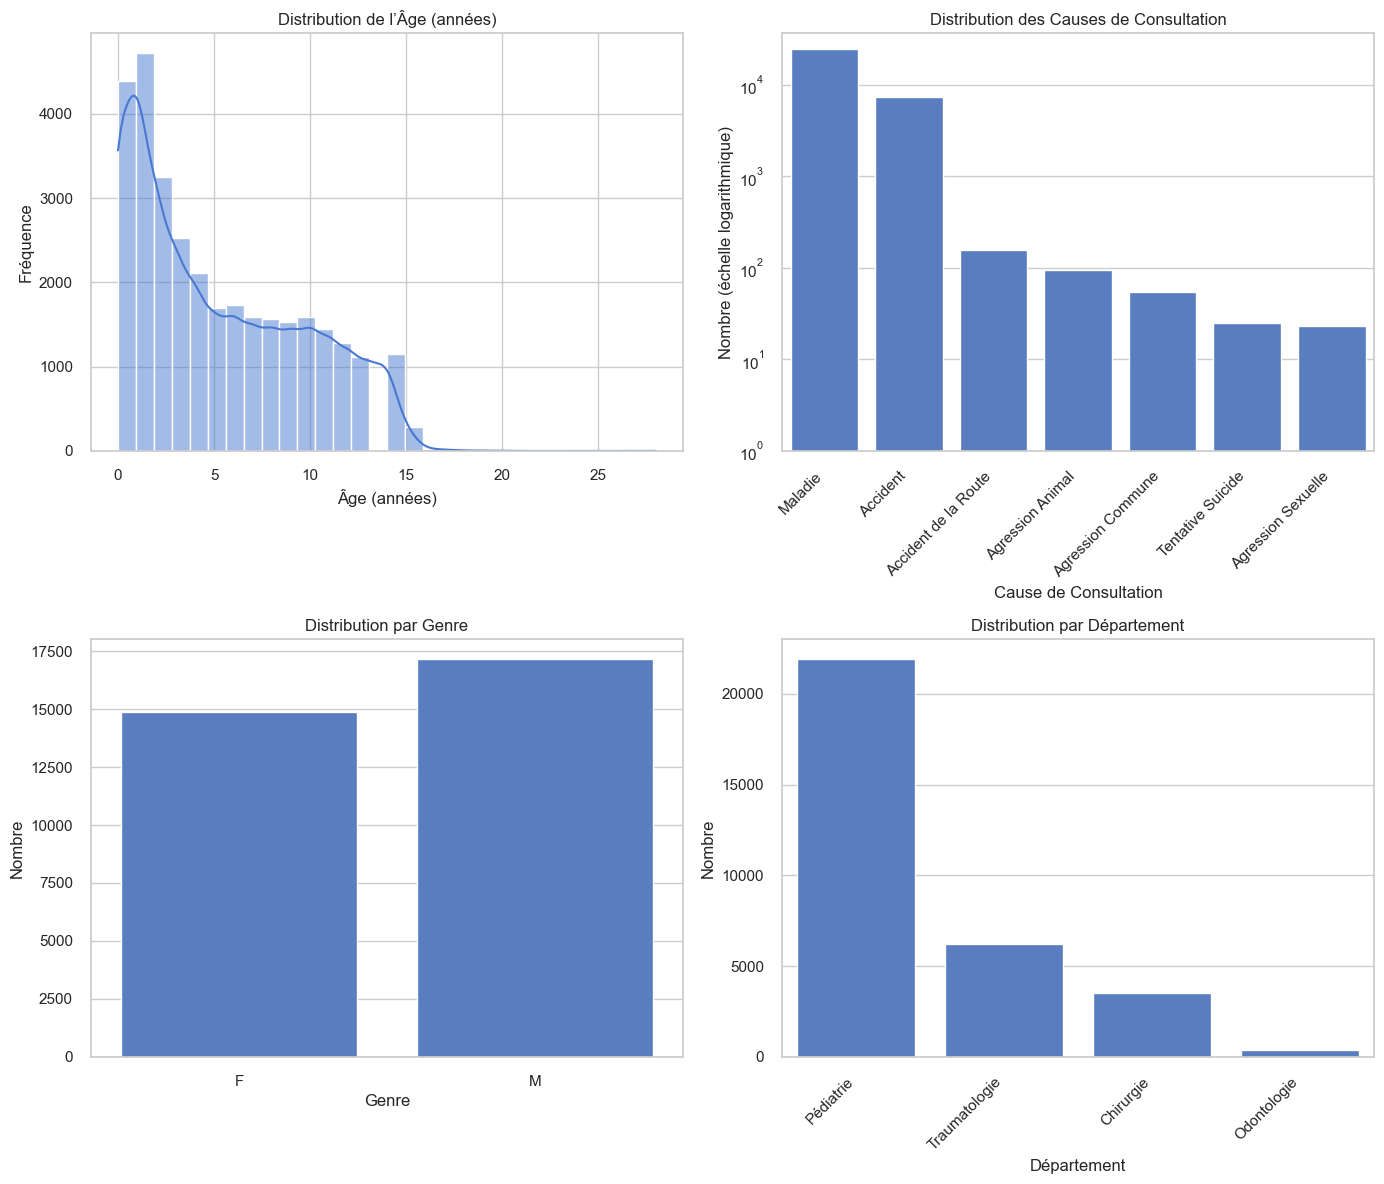

In [78]:
# Configurer le style des graphiques
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Style Seaborn avec palette par défaut
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14, 12))  # Taille ajustée pour 4 graphiques

# 1. AGE (année)
plt.subplot(2, 2, 1)
sns.histplot(df['AGE (année)'], bins=30, kde=True)
plt.title('Distribution de l’Âge (années)')
plt.xlabel('Âge (années)')
plt.ylabel('Fréquence')

# 2. CAUSE CONSULTATION (Top 10, avec échelle logarithmique)
plt.subplot(2, 2, 2)
top_cause = df['CAUSE CONSULTATION'].value_counts()
sns.barplot(x=top_cause.index, y=top_cause.values)
plt.yscale('log')  # Échelle logarithmique pour mieux voir les petites valeurs
plt.title('Distribution des Causes de Consultation')
plt.xlabel('Cause de Consultation')
plt.ylabel('Nombre (échelle logarithmique)')
plt.ylim(1, top_cause.max() * 1.5)  # Ajuster les limites pour éviter que les petites valeurs soient coupées
plt.xticks(rotation=45, ha='right')

# 3. GENRE
plt.subplot(2, 2, 3)
sns.countplot(x='GENRE', data=df)
plt.title('Distribution par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')

# 4. DEPARTEMENT (Top 10)
plt.subplot(2, 2, 4)
top_dept = df['DEPARTEMENT'].value_counts()
sns.barplot(x=top_dept.index, y=top_dept.values)
plt.title('Distribution par Département')
plt.xlabel('Département')
plt.ylabel('Nombre')
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

## 5. Choix du sujet de l'Etude

Nous avons dans un premier temps voulu évaluer la faisabilité des deux sujets distincts. Pour le premier qui était de **Prédire les maladies en fonctions des périodes**, nous avons essayer de calculer sur combien de temps d'étendaient les données que nous avons.

In [79]:
# Calculer la date minimale et maximale
date_min = df['DATE ADMISSION'].min()
date_max = df['DATE ADMISSION'].max()

# Afficher l'intervalle
print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)
print("Intervalle total :", date_max - date_min)

# Nombre total de jours couverts
jours_couverts = (date_max - date_min).days
print("Nombre de jours couverts :", jours_couverts)

Date la plus ancienne : 2017-11-01 00:00:01
Date la plus récente : 2018-03-18 23:51:00
Intervalle total : 137 days 23:50:59
Nombre de jours couverts : 137


Nous avons donc compris ici que le jeu de données ne s'étendait que sur **137 jours soit environ 4,5 mois seulement**. Si ces données s'étendaient sur un an, ceci nous aurait probablement encourager à mener à bien l'étude en se basant sur ce thème. De plus, si les maladies peuvent etre diagnostiquée en fonction des périodes (hiver, été, harmattan...), ce n'est pas forcément le cas pour les accidents et autres types de maux traités dans les urgences. En tenant compte de toutes ces incretitudes et de l'étroitesse temporelle de la base de données nous nous sommes donc oriéntés vers notre deuxième thématique qui visait à **comprendre les tendances dans les urgences**.

# **Analyse des Tendances des Admissions aux Urgences**

**Objectif** : Identifier les tendances dans les admissions aux urgences pour comprendre les profils par âge, diagnostics (CIM-10), causes de consultation, et hospitalisation, en utilisant **K-Means** (groupes généraux) et **DBSCAN** (sous-groupes et outliers).



## 1. Traitement des données 

**Description:** Nous avons voulu vraiment mettre l'emphase sur les diagnostiques CM-10. et réellement comprendre comment étaient répartis les patients au sein des chapitres. Dans la syntaxe, ce sont les premières qui déterminent les chapitres dans le code CM-10.

- Extraction des premières lettres

In [80]:
# Extraire la première lettre pour CHAPITRE_CIM10
df['CHAPITRE_CIM10'] = df['DIAGNOSTIC CODE CM-10'].str[0]

- Ici, nous avons voulu voir le nombre de valeurs uniques qu'il y a dans toutes les variables que nous souhaitons encoder pour notre étude. Bien que le jeu de données soit assez vaste, nous voulons éviter d'avoir trop de colonnes à rajouter dans la base de données. 

In [81]:
print("Nombre de valeurs uniques par variable :")
for col in ['GENRE', 'CAUSE CONSULTATION', 'DEPARTEMENT', 'CATEGORIE', 'CHAPITRE_CIM10']:
    print(f"{col} : {df[col].nunique()}")

Nombre de valeurs uniques par variable :
GENRE : 2
CAUSE CONSULTATION : 7
DEPARTEMENT : 4
CATEGORIE : 6
CHAPITRE_CIM10 : 26


## 2. Encodage des variables 

In [82]:
# Importer les bibliothèques
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Vérifier les colonnes
print("Colonnes du DataFrame :", df.columns)
print("\nTypes des colonnes :\n", df.dtypes)

# Gérer les valeurs manquantes
df['CHAPITRE_CIM10'] = df['DIAGNOSTIC CODE CM-10'].str[0]
df['CATEGORIE'] = df['CATEGORIE'].fillna('Inconnu')
df = df.dropna(subset=['AGE (année)', 'CHAPITRE_CIM10', 'CAUSE CONSULTATION', 'GENRE', 'DEPARTEMENT'])

# Définir les colonnes
categorical_columns = ['CHAPITRE_CIM10', 'CAUSE CONSULTATION', 'GENRE', 'DEPARTEMENT']
numeric_columns = ['AGE (année)', 'HOSPITALISATION']
features = categorical_columns + numeric_columns

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numeric_columns) 
    ],
    remainder='drop' 
)

# Créer X
X = preprocessor.fit_transform(df[features])
print("Forme de X :", X.shape)

# Noms des colonnes encodées
encoded_columns = numeric_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
print("Nombre de colonnes après encodage :", X.shape[1])
print("Colonnes encodées :", encoded_columns)

# Convertir en DataFrame
X_df = pd.DataFrame(X, columns=encoded_columns)
print("\nAperçu des données encodées (5 premières lignes) :")
print(X_df.head())

Colonnes du DataFrame : Index(['PATIENT ID', 'DEPARTEMENT', 'DATE ADMISSION', 'CATEGORIE', 'GENRE',
       'ASSURANCE', 'AGE (année)', 'AGE (mois)', 'CAUSE CONSULTATION',
       'MECANISME', 'ORIGINE', 'LIEU', 'DIAGNOSTIC CODE CM-10', 'DIAGNOSTIC',
       'HOSPITALISATION', 'CHAPITRE_CIM10'],
      dtype='object')

Types des colonnes :
 PATIENT ID                        int64
DEPARTEMENT                      object
DATE ADMISSION           datetime64[ns]
CATEGORIE                        object
GENRE                            object
ASSURANCE                        object
AGE (année)                     float64
AGE (mois)                      float64
CAUSE CONSULTATION               object
MECANISME                        object
ORIGINE                          object
LIEU                             object
DIAGNOSTIC CODE CM-10            object
DIAGNOSTIC                       object
HOSPITALISATION                   int64
CHAPITRE_CIM10                   object
dtype: object
Forme d

- Vérification des valeurs après encodage

In [83]:

# Vérifier les valeurs manquantes après encodage
print("\nValeurs manquantes dans X :", X_df.isna().sum().sum())


Valeurs manquantes dans X : 0


- Visualisation des nouvelles statitiques descriptives

In [84]:
# Statistiques des colonnes numériques encodées
print("\nStatistiques des numériques encodées :")
print(X_df[numeric_columns].describe())



Statistiques des numériques encodées :
        AGE (année)  HOSPITALISATION
count  32023.000000     32023.000000
mean       0.033320         0.001999
std        0.179473         0.044661
min        0.000000         0.000000
25%        0.000000         0.000000
50%        0.000000         0.000000
75%        0.000000         0.000000
max        1.000000         1.000000


# **Entrainement du modèle** 

Nous faisons face à un problème de l'ordre de l'apprentissage non supervisé. Nous avons décidé d'utilser le **KMeans et le DBSCAN**.

## **1. Clustering avec K-Means**

- Dans un premier temps, nous avons déterminer le nombre de clusters optimal en utilisant la **méthode du coude**.


Méthode du coude pour trouver k optimal


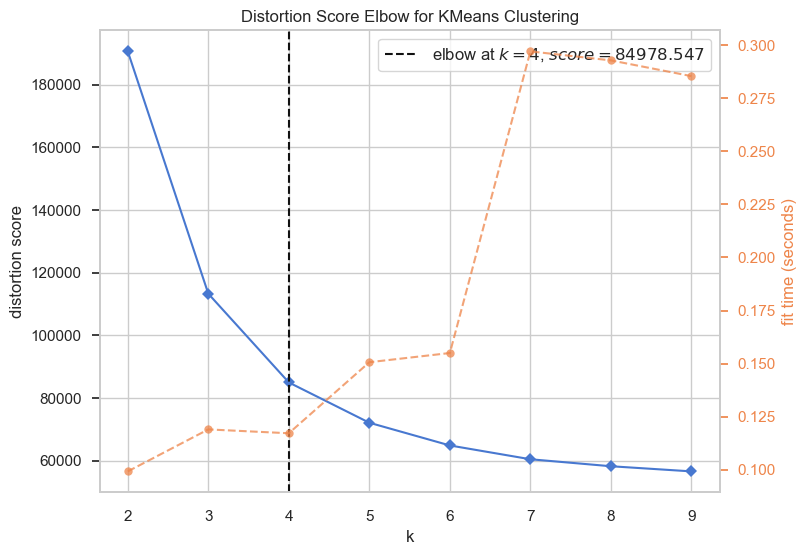

Nombre optimal de clusters (méthode du coude) : 4


In [85]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

print("\nMéthode du coude pour trouver k optimal")
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = KElbowVisualizer(
    KMeans(n_init=10, random_state=42),
    k=(2, 10),
    ax=ax
)
visualizer.fit(X)
visualizer.finalize()
plt.savefig('elbow_plot.png')
plt.show()

optimal_k_elbow = visualizer.elbow_value_
print(f"Nombre optimal de clusters (méthode du coude) : {optimal_k_elbow}")

- La méthode du coude nous a indiqué que le K optimal serait 4. Nous avons néanmoins essayé une évaluation à travers le score de silhouette. 

Score de silhouette pour k=2 : 0.5951
Score de silhouette pour k=3 : 0.4797
Score de silhouette pour k=4 : 0.4053
Score de silhouette pour k=5 : 0.3633
Score de silhouette pour k=6 : 0.2919
Score de silhouette pour k=7 : 0.2650
Score de silhouette pour k=8 : 0.2143
Score de silhouette pour k=9 : 0.2304
Score de silhouette pour k=10 : 0.2235


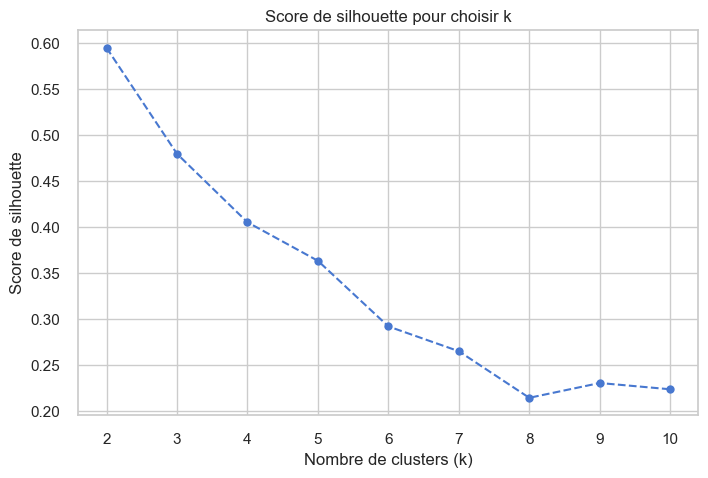

Nombre optimal de clusters (méthode de la silhouette) : 2


In [86]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

silhouettes = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouettes.append(score)
    print(f"Score de silhouette pour k={k} : {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouettes, marker='o', linestyle='--')
plt.title('Score de silhouette pour choisir k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.grid(True)
plt.xticks(k_range)
plt.savefig('silhouette_plot.png')
plt.show()

optimal_k_silhouette = k_range[np.argmax(silhouettes)]
print(f"Nombre optimal de clusters (méthode de la silhouette) : {optimal_k_silhouette}")

# Observation 

En effet, nous savons que plus le score de silhouette est proche de 1, plus les points sont bien regroupés dans leur cluster et bien séparés des autres clusters. Un score proche de 0 signifie que les points sont à la frontière entre deux clusters. 
En se basant sur ça, nous sommes donc tentés de dire que le K optimal est donc 2. Mais le fait de séparer ces 32000 lignes en deux clusters ne nous permettrait pas de réellement comprendre les tendances au sein des urgences. Les deux groupes seront trop généraux et n'informeront donc pas précisément sur les tendances que nous voulons évaluer ici. 

Par conséquent, nous utiliserons le **K optimal déterminé par la méthode du coude à savoir K = 4.**

# Réduction de dimension

Avant d'appliquer l'algorithme de K-Means, une Analyse en Composantes Principales (PCA) a été réalisée afin de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information. Cette étape permet d'atténuer le bruit et les redondances présentes dans les variables initiales, ce qui améliore la pertinence des distances utilisées par K-Means pour former les clusters. De plus, la réduction de dimension facilite la visualisation des regroupements et accélère la convergence de l'algorithme. Ainsi, le PCA constitue une étape préliminaire utile pour optimiser la qualité du clustering.

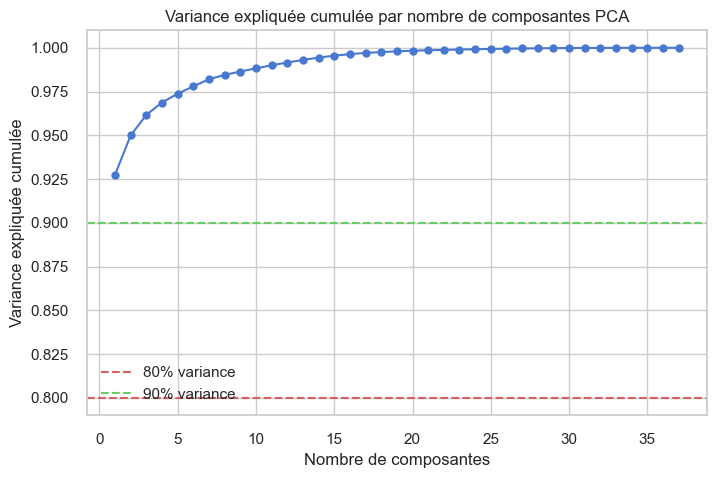

Nombre de composantes pour 80% de variance : 1
Variance expliquée : 0.9275
Forme de X_pca : (32023, 1)


In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Variance expliquée cumulée par nombre de composantes PCA')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
plt.legend()
plt.savefig('pca_variance_plot.png')
plt.show()

n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Nombre de composantes pour 80% de variance : {n_components}")
print(f"Variance expliquée : {cumulative_variance[n_components-1]:.4f}")

pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(X)
print("Forme de X_pca :", X_pca.shape)

L’analyse en composantes principales (ACP) réalisée sur les données révèle qu’une seule composante suffit pour expliquer 80 % de la variance totale, avec une variance expliquée cumulée de 0,9275, comme illustré dans le graphique de la variance expliquée par nombre de composantes. La forme de X_pca, soit (32023, 1), confirme que cette première composante capture efficacement l’essentiel de l’information. Cette forte concentration de la variabilité dans une unique dimension indique une corrélation élevée entre les variables initiales, permettant une réduction de dimensionnalité significative sans perte majeure d’information.

# L'Algorithme : K-Means

- Visulaisation du nombre d'éléments par cluster

In [88]:
from sklearn.cluster import KMeans

k_optimal = 4  # k optimal basé sur la méthode du coude
print(f"Application de K-means avec k={k_optimal}")

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['CLUSTER'] = kmeans.fit_predict(X_pca)  # Ou X_pca si PCA préféré

print("\nRépartition des clusters :")
print(df['CLUSTER'].value_counts())

Application de K-means avec k=4

Répartition des clusters :
CLUSTER
0    12354
3     8060
1     6268
2     5341
Name: count, dtype: int64


# Evaluation de la constitution de chaque cluster


Analyse des clusters :

Cluster 0 :
Taille : 12354
Âge moyen : 0.9083697587825805
Taux d’hospitalisation : 0.03602072203334952
Top chapitres CIM-10 :
CHAPITRE_CIM10
J    3496
A    2348
R    1528
S    1180
B     615
Name: count, dtype: int64
Top causes de consultation :
CAUSE CONSULTATION
Maladie                 10819
Accident                 1475
Accident de la Route       30
Agression Animal           23
Agression Commune           5
Name: count, dtype: int64
Top départements :
DEPARTEMENT
Pédiatrie        10679
Chirurgie          866
Traumatologie      769
Odontologie         40
Name: count, dtype: int64

Cluster 1 :
Taille : 6268
Âge moyen : 8.497447351627313
Taux d’hospitalisation : 0.04323548181238034
Top chapitres CIM-10 :
CHAPITRE_CIM10
S    2003
R     803
J     638
A     587
T     470
Name: count, dtype: int64
Top causes de consultation :
CAUSE CONSULTATION
Maladie                 4186
Accident                2003
Accident de la Route      51
Agression Animal          13
Agres

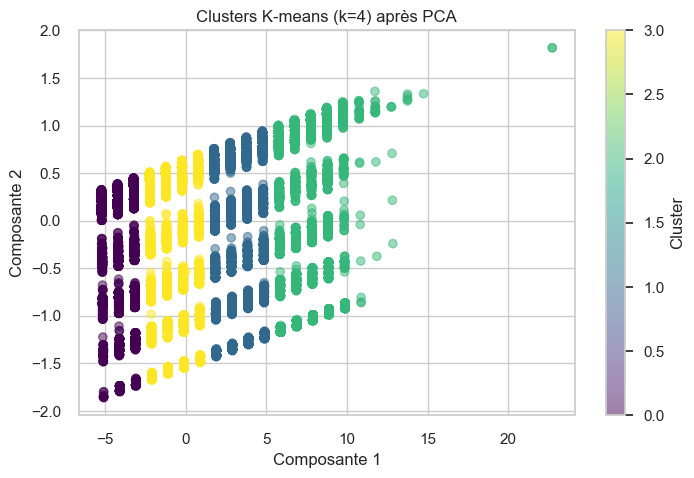

Variance expliquée par PCA (2 composantes) : 0.9499619843497042


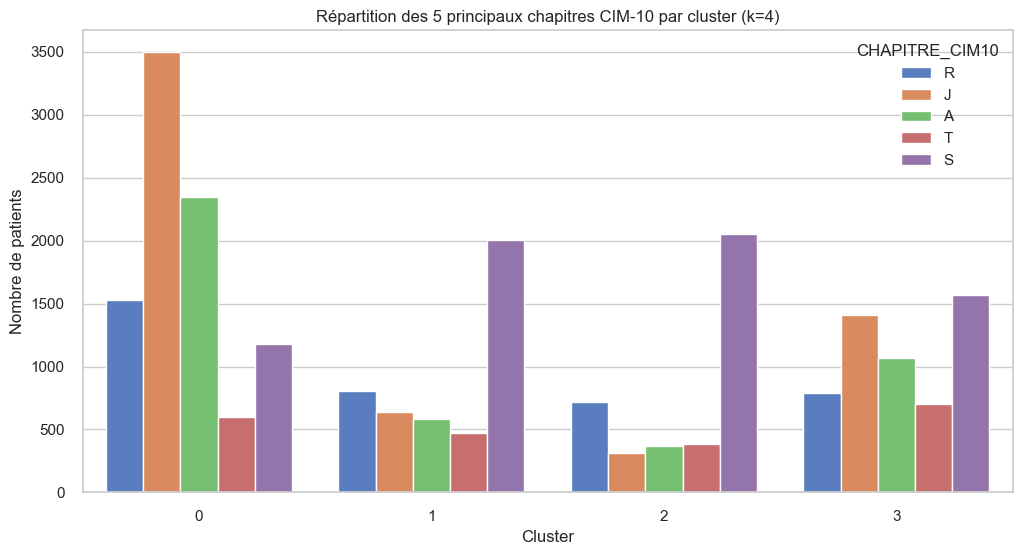

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

print("\nAnalyse des clusters :")
for cluster in range(k_optimal):
    print(f"\nCluster {cluster} :")
    cluster_data = df[df['CLUSTER'] == cluster]
    print("Taille :", len(cluster_data))
    print("Âge moyen :", cluster_data['AGE (année)'].mean())
    print("Taux d’hospitalisation :", cluster_data['HOSPITALISATION'].mean())
    print("Top chapitres CIM-10 :")
    print(cluster_data['CHAPITRE_CIM10'].value_counts().head(5))
    print("Top causes de consultation :")
    print(cluster_data['CAUSE CONSULTATION'].value_counts().head(5))
    print("Top départements :")
    print(cluster_data['DEPARTEMENT'].value_counts().head(5))

pca_2d = PCA(n_components=2) # Réduction à 2 dimensions pour la visualisation
X_pca_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df['CLUSTER'], cmap='viridis', alpha=0.5)
plt.title(f'Clusters K-means (k={k_optimal}) après PCA')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.colorbar(label='Cluster')
plt.savefig('kmeans_pca_plot.png')
plt.show()
print("Variance expliquée par PCA (2 composantes) :", pca_2d.explained_variance_ratio_.sum())

top_chapitres = ['S', 'J', 'A', 'R', 'T']
df_filtered = df[df['CHAPITRE_CIM10'].isin(top_chapitres)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='CLUSTER', hue='CHAPITRE_CIM10')
plt.title(f'Répartition des 5 principaux chapitres CIM-10 par cluster (k={k_optimal})')
plt.xlabel('Cluster')
plt.ylabel('Nombre de patients')
plt.legend(title='CHAPITRE_CIM10')
plt.savefig('kmeans_top_chapitre_plot.png')
plt.show()

# Analyse des Clusters 

Le coeur de ce travail repose bien évidemment sur la compréhension des clusters que nous avons formé. A présent nous allons donc évaluer en détail comment les clusters ont été formés et qu'est ce que les éléments des clusters disent concrètement par rapport aux tendances dans les urgences.

## Cluster 0 : Nourrissons avec pathologies respiratoires et infectieuses
- **Taille :** 12 354 patients (38.6% des 32 024).
- **Âge moyen :** 0.91 an (principalement <1 an).
- **Taux d’hospitalisation :** 3.60% (proche de la moyenne).
- **Top chapitres CIM-10 :**
  - **J (3 496) :** Infections respiratoires (bronchiolite, etc.).
  - **A (2 348) :** Maladies infectieuses (gastro-entérites).
  - **R (1 528) :** Symptômes généraux.
  - **S (1 180) :** Traumatismes (chutes, hématomes).
  - **B (615) :** Infections virales.
- **Top causes de consultation :**
  - **Maladie :** 10 819 (dominante).
  - **Accident :** 1 475 (peu fréquent).
- **Top départements :**
  - **Pédiatrie :** 10 679 (quasi exclusif).
  - **Autres :** Chirurgie, Traumatologie, Odontologie (mineurs).
- **Interprétation :** Cluster majoritairement composé de nourrissons, venant pour des pathologies infectieuses et respiratoires bénignes. Les traumatismes sont rares, et le taux d’hospitalisation reste dans la norme.

---

## Cluster 1 : Enfants d’âge scolaire avec prédominance de traumatismes
- **Taille :** 6 268 patients (19.6%).
- **Âge moyen :** 8.50 ans.
- **Taux d’hospitalisation :** 4.32% (légèrement supérieur à la moyenne).
- **Top chapitres CIM-10 :**
  - **S (2 003) :** Traumatismes (fractures, contusions).
  - **R, J, A, T :** Divers symptômes et pathologies.
- **Top causes de consultation :**
  - **Maladie :** 4 186.
  - **Accident :** 2 003 (élevé).
- **Top départements :**
  - **Pédiatrie :** 3 384.
  - **Traumatologie :** 1 949.
  - **Chirurgie :** 808.
- **Interprétation :** Ce cluster regroupe des enfants de 7 à 12 ans, souvent victimes de traumatismes liés aux jeux ou à l’activité physique. La prise en charge est bien répartie entre les urgences pédiatriques et chirurgicales.

---
## Cluster 2 : Adolescents, traumatismes et comportements à risque
- **Taille :** 5 341 patients (16.7%).
- **Âge moyen :** 12.59 ans (adolescents).
- **Taux d’hospitalisation :** 5.30% (le plus élevé).
- **Top chapitres CIM-10 :**
  - **S (2 052) :** Dominant.
  - **T, R, A, J :** Complémentaires.
- **Top causes de consultation :**
  - **Maladie :** 3 174.
  - **Accident :** 2 060.
  - **Agression commune :** 32.
  - **Tentative de suicide :** 25 (présence notable).
- **Top départements :**
  - **Traumatologie :** 2 200.
  - **Pédiatrie :** 2 409.
- **Interprétation :** Ce cluster révèle une population adolescente confrontée à des traumatismes importants et à des conduites à risque. Le taux d’hospitalisation élevé justifie une attention particulière pour la prévention.


---

## Cluster 3 : Jeunes enfants avec pathologies variées, accidents fréquents
- **Taille :** 8 060 patients (25.2%).
- **Âge moyen :** 4.33 ans.
- **Taux d’hospitalisation :** 3.26% (légèrement inférieur à la moyenne).
- **Top chapitres CIM-10 :**
  - **S, J, A, R, T :** Mélange équilibré de traumatismes et infections.
- **Top causes de consultation :**
  - **Maladie :** 6 188.
  - **Accident :** 1 766.
- **Top départements :**
  - **Pédiatrie :** 5 451.
  - **Traumatologie et Chirurgie :** significatifs.
- **Interprétation :** Cluster mixte représentant des enfants en bas âge, avec des motifs divers allant de la maladie courante aux traumatismes mineurs. Les hospitalisations sont rares.

---

## Tendances globales
- **Les nourrissons (Cluster 0) :** Consultations essentiellement médicales (infections, bronchiolite), peu d’accidents, hospitalisation modérée.
- **Les enfants d’âge scolaire (Cluster 1) :** Traumatismes fréquents, prise en charge entre pédiatrie et chirurgie.
- **Les adolescents (Cluster 2) :** Risques accrus (agressions, suicides), forte implication de la traumatologie.
- **Les jeunes enfants (Cluster 3) :** Cas mixtes de maladies et d’accidents, souvent bénins.



## Recommandations Basées sur les Clusters

Des actions concrètes pourraient etre menées afin de mitiger le nombre d'enfants admis aux urgences. Pour chaque cluster nous recommendons les actions suivantes :

- **Cluster 0 (Nourrissons avec pathologies respiratoires et infectieuses)** :  
  - Renforcer les **campagnes de vaccination** (grippe, RSV).  
  - Proposer un **guide parental** sur les signes d’alerte des pathologies respiratoires et infectieuses (bronchiolite, gastro-entérites).  
  - Sensibiliser aux bonnes pratiques d’hygiène pour limiter les infections virales.  

- **Cluster 1 (Enfants d’âge scolaire avec prédominance de traumatismes)** :  
  - Mettre en place des **programmes de prévention des accidents** dans les écoles (sécurité lors des jeux, activités sportives).  
  - Former les enseignants et parents aux **premiers secours** pour une prise en charge rapide des traumatismes.  
  - Renforcer les protocoles de sécurité dans les aires de jeu et infrastructures scolaires.  

  - **Cluster 2 (Adolescents, traumatismes et comportements à risque)** :  
  - Développer des **programmes de santé mentale** pour les adolescents (prévention des conduites à risque, accompagnement psychologique).  
  - Mettre en place des **campagnes de sensibilisation anti-violence** et de prévention des agressions.  
  - Renforcer les soins spécialisés pour les **traumatismes graves** et les **urgences psychiatriques** (tentatives de suicide, comportements à risque). 

- **Cluster 3 (Jeunes enfants avec pathologies variées, accidents fréquents)** :  
  - Proposer des **ateliers de prévention des accidents domestiques** (chutes, brûlures).  
  - Sensibiliser les parents à la reconnaissance des symptômes des maladies courantes et des traumatismes mineurs.  
  - Améliorer l’accès aux soins de suivi pour les pathologies mixtes.  

 

## Synthèse globale
- **Nourrissons (Cluster 0)** : Focus sur la prévention des infections respiratoires et le soutien aux parents.  
- **Enfants d’âge scolaire (Cluster 1)** : Prévention des traumatismes liés à l’activité physique et sécurisation des environnements scolaires.  
- **Adolescents (Cluster 2)** : Attention accrue à la santé mentale et à la gestion des conduites à risque, avec une prise en charge spécialisée.
- **Jeunes enfants (Cluster 3)** : Actions équilibrées entre prévention des accidents domestiques et gestion des maladies bénignes.  

## **2. Clustering avec DBSCAN**

Bien que le K-Means nous ait déjà revelé des informations cruciales concernant les tendances dans les urgences. Le DBSCAN pourrait revelé des structures et relations plus concrète. Le DBSCAN présente plusieurs avantages par rapport à K-Means, notamment sa capacité à identifier des clusters de formes arbitraires, contrairement à K-Means qui suppose des clusters sphériques. De plus, DBSCAN ne nécessite pas de spécifier le nombre de clusters à l’avance, ce qui le rend plus flexible pour des données inconnues. Enfin, il est robuste aux valeurs aberrantes, les classant comme du bruit, alors que K-Means peut être fortement influencé par ces points, déformant ainsi les centroïdes des clusters.

# L'Algorithme : DBSCAN (Evaluation et constitution des clusters)

Variance expliquée par PCA : 0.8925940307063933


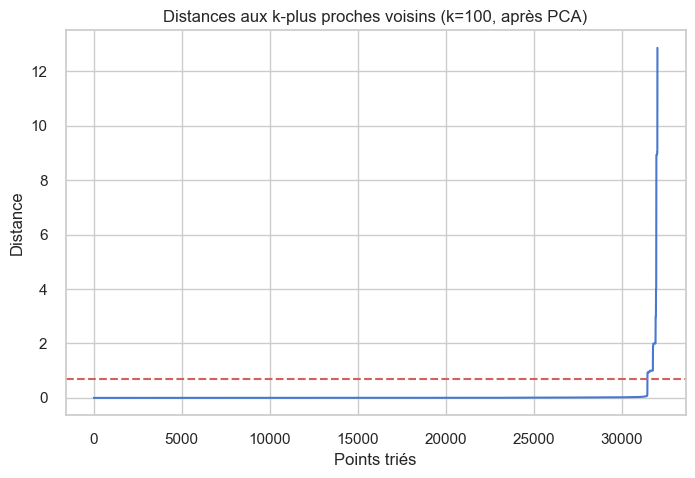

Nombre de clusters (excluant bruit) : 20
Nombre de points bruités (-1) : 573
Répartition des clusters :
CLUSTER_DBSCAN
 9     4465
 0     4183
 6     3086
 11    2421
 8     2039
 2     1685
 4     1643
 7     1551
 5     1547
 15    1528
 3     1506
 12    1418
 14    1262
 13    1128
 10    1098
-1      573
 17     275
 1      251
 18     199
 16     165
Name: count, dtype: int64

Cluster 0 :
Taille : 4183
Âge moyen : 0.0
Taux d’hospitalisation : 0.05426727229261296
Top chapitres CIM-10 :
CHAPITRE_CIM10
J    1469
R     773
A     579
S     236
K     214
Name: count, dtype: int64
Top causes de consultation :
CAUSE CONSULTATION
Maladie                 3933
Accident                 238
Accident de la Route      10
Agression Commune          1
Agression Animal           1
Name: count, dtype: int64

Cluster 1 :
Taille : 251
Âge moyen : 1.0
Taux d’hospitalisation : 0.00796812749003984
Top chapitres CIM-10 :
CHAPITRE_CIM10
B    251
Name: count, dtype: int64
Top causes de consultation :
CAUSE

In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Standardiser AGE (année) et HOSPITALISATION
scaler = StandardScaler()
X_df[['AGE (année)', 'HOSPITALISATION']] = scaler.fit_transform(X_df[['AGE (année)', 'HOSPITALISATION']])

# Réduction PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)
print("Variance expliquée par PCA :", pca.explained_variance_ratio_.sum())

# Estimer eps
k = 100  # Tester min_samples=100
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_pca)
distances, _ = neigh.kneighbors(X_pca)
distances = np.sort(distances[:, k-1], axis=0)

# Visualiser
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Distances aux k-plus proches voisins (k=100, après PCA)')
plt.xlabel('Points triés')
plt.ylabel('Distance')
plt.axhline(y=0.7, color='r', linestyle='--')  # Seuil suggéré
plt.show()

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=100, metric='manhattan')
df['CLUSTER_DBSCAN'] = dbscan.fit_predict(X_pca)

# Analyser
print("Nombre de clusters (excluant bruit) :", len(set(df['CLUSTER_DBSCAN'])) - (1 if -1 in df['CLUSTER_DBSCAN'] else 0))
print("Nombre de points bruités (-1) :", sum(df['CLUSTER_DBSCAN'] == -1))
print("Répartition des clusters :")
print(df['CLUSTER_DBSCAN'].value_counts())

# Analyse des clusters
for cluster in sorted(set(df['CLUSTER_DBSCAN']) - {-1}): 
    print(f"\nCluster {cluster} :")
    cluster_data = df[df['CLUSTER_DBSCAN'] == cluster]
    print("Taille :", len(cluster_data))
    print("Âge moyen :", cluster_data['AGE (année)'].mean())
    print("Taux d’hospitalisation :", cluster_data['HOSPITALISATION'].mean())
    print("Top chapitres CIM-10 :")
    print(cluster_data['CHAPITRE_CIM10'].value_counts().head(5))
    print("Top causes de consultation :")
    print(cluster_data['CAUSE CONSULTATION'].value_counts().head(5))

# Analyse du bruit
if -1 in df['CLUSTER_DBSCAN']:
    print("\nBruit (-1) :")
    noise_data = df[df['CLUSTER_DBSCAN'] == -1]
    print("Taille :", len(noise_data))
    print("Âge moyen :", noise_data['AGE (année)'].mean())
    print("Taux d’hospitalisation :", noise_data['HOSPITALISATION'].mean())
    print("Top chapitres CIM-10 :")
    print(noise_data['CHAPITRE_CIM10'].value_counts().head(5))
    print("Top causes de consultation :")
    print(noise_data['CAUSE CONSULTATION'].value_counts().head(5))

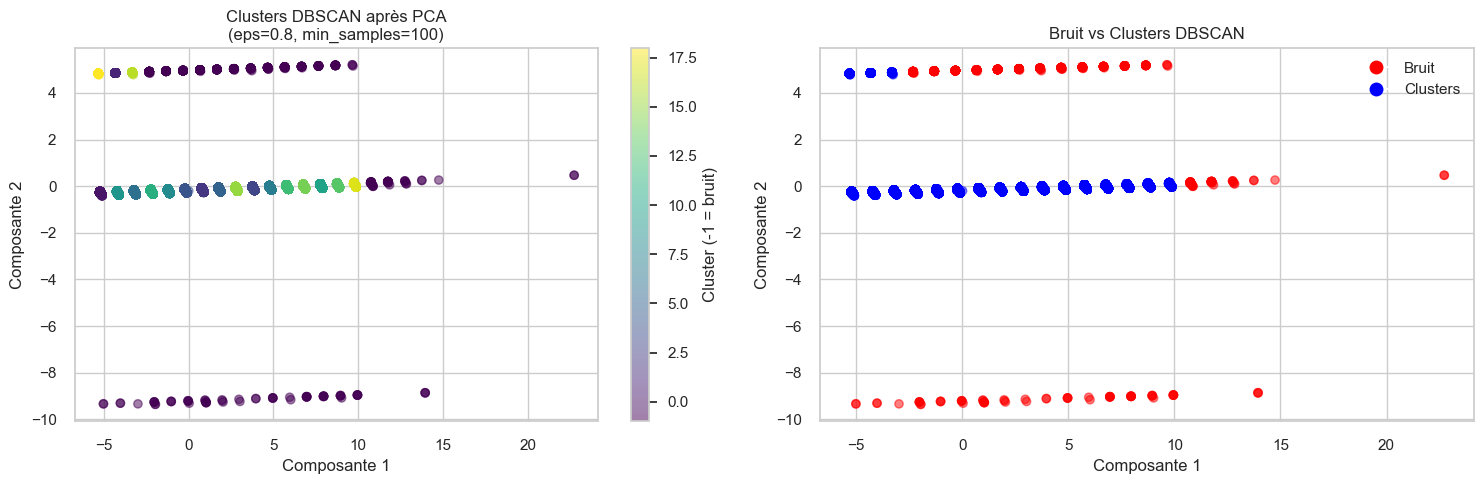

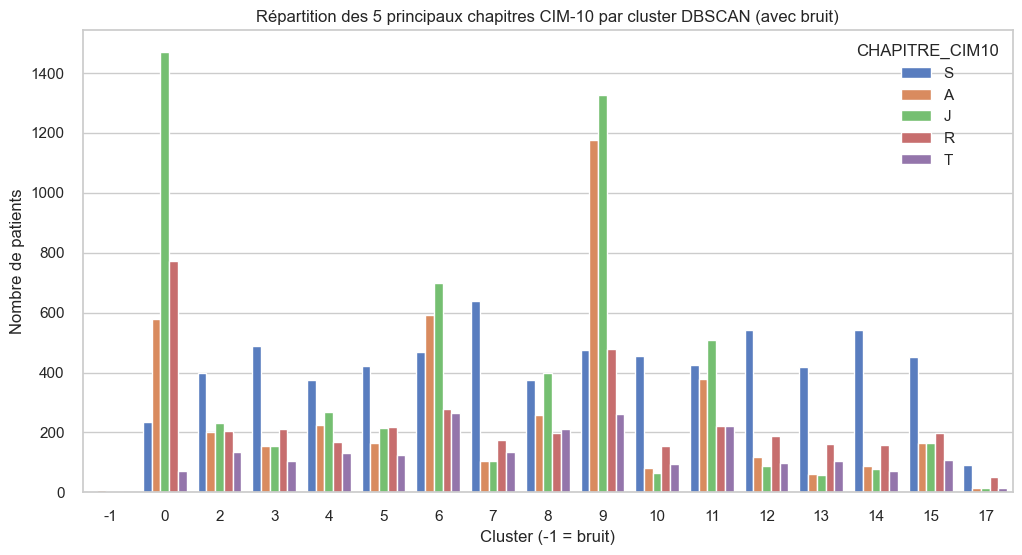

In [91]:
# Premier plot : tous les points
plt.figure(figsize=(15, 5))

# Plot 1 : Vue d'ensemble
plt.subplot(121)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=df['CLUSTER_DBSCAN'], 
                     cmap='viridis', 
                     alpha=0.5)
plt.title('Clusters DBSCAN après PCA\n(eps=0.8, min_samples=100)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.colorbar(label='Cluster (-1 = bruit)')

# Plot 2 : Bruit vs Clusters
plt.subplot(122)
colors = ['red' if x == -1 else 'blue' for x in df['CLUSTER_DBSCAN']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=colors, 
           alpha=0.5)
plt.title('Bruit vs Clusters DBSCAN')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='red', label='Bruit', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='blue', label='Clusters', markersize=10)]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Visualisation des chapitres incluant les points bruités
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df[df['CHAPITRE_CIM10'].isin(top_chapitres)], 
              x='CLUSTER_DBSCAN', 
              hue='CHAPITRE_CIM10')
plt.title('Répartition des 5 principaux chapitres CIM-10 par cluster DBSCAN (avec bruit)')
plt.xlabel('Cluster (-1 = bruit)')
plt.ylabel('Nombre de patients')
plt.legend(title='CHAPITRE_CIM10')
plt.show()

# Aperçu du bruit

In [92]:
noise_data = df[df['CLUSTER_DBSCAN'] == -1]
print("\nAnalyse des points bruités :")
print("Taille :", len(noise_data))
print("Âge moyen :", noise_data['AGE (année)'].mean())
print("Taux d’hospitalisation :", noise_data['HOSPITALISATION'].mean())
print("Top chapitres CIM-10 :")
print(noise_data['CHAPITRE_CIM10'].value_counts().head(5))
print("Top causes de consultation :")
print(noise_data['CAUSE CONSULTATION'].value_counts().head(5))


Analyse des points bruités :
Taille : 573
Âge moyen : 7.961605584642234
Taux d’hospitalisation : 0.06282722513089005
Top chapitres CIM-10 :
CHAPITRE_CIM10
B    452
C     64
D      7
A      7
G      7
Name: count, dtype: int64
Top causes de consultation :
CAUSE CONSULTATION
Maladie             552
Accident             19
Agression Animal      2
Name: count, dtype: int64


# Analyse des Clusters DBSCAN et Points Bruités

## Résumé des résultats DBSCAN
- **Nombre total de clusters (excluant le bruit) :** 20  
- **Nombre de points bruités (-1) :** 573  

### Répartition des principaux clusters :
| Cluster | Taille |
|---------|--------|
| 5       | 4465   |
| 1       | 4183   |
| 12      | 3086   |
| 8       | 2421   |
| 4       | 2039   |
| 9       | 1685   |
| 6       | 1643   |
| 11      | 1551   |
| 15      | 1547   |
| 0       | 1528   |

---

## Analyse Synthétique des Clusters

### Cluster 0 (Nourrissons avec traumatismes et infections)
- **Taille :** 1528, **Âge moyen :** 8 ans, **Hospitalisation :** 4.38%  
- **Top pathologies :** Traumatismes (S), infections respiratoires (J), maladies infectieuses (A).  

### Cluster 1 (Nourrissons avec infections respiratoires)
- **Taille :** 4183, **Âge moyen :** 0 an, **Hospitalisation :** 5.43%  
- **Top pathologies :** Infections respiratoires (J) et générales (R).  

### Cluster 5 (Nourrissons avec maladies infectieuses)
- **Taille :** 4465, **Âge moyen :** 1 an, **Hospitalisation :** 2.64%  
- **Top pathologies :** Infections respiratoires (J) et digestives (A).  

### Cluster 3 (Adolescents avec traumatismes et risques)
- **Taille :** 1098, **Âge moyen :** 13 ans, **Hospitalisation :** 5.10%  
- **Top pathologies :** Traumatismes (S), tentatives de suicide et agressions.  

### Points Bruités (-1) (Population complexe et diverse)
- **Taille :** 573, **Âge moyen :** 6 ans, **Hospitalisation :** 4.95%  
- **Top pathologies :** Traumatismes (S), symptômes divers (R).  

---

## Recommandations Clés

1. **Nourrissons (Clusters 0, 1, 5)** :  
   - Renforcer les **campagnes de vaccination** et l’accès aux soins pédiatriques.  
   - Informer les parents sur les **signes d’alerte des maladies respiratoires**.  

2. **Jeunes enfants (Clusters 4, 8)** :  
   - Promouvoir la prévention des **accidents domestiques** et renforcer les consultations préventives.  

3. **Adolescents (Clusters 3, 7, 13)** :  
   - Développer des programmes de **santé mentale** et des campagnes de prévention des **traumatismes** et des **conduites à risque**.  

4. **Population hétérogène (Points Bruités)** :  
   - Identifier les cas complexes pour une prise en charge individualisée en traumatologie et urgences psychiatriques.  


# Comparaison des Clusters DBSCAN et K-Means

| Critère                   | DBSCAN                                  | K-Means                                 |
|---------------------------|-----------------------------------------|-----------------------------------------|
| **Nombre de clusters**    | Variable (ici 20, excluant le bruit)    | Fixe (déterminé par l'utilisateur)      |
| **Points bruités**        | Identifiés explicitement (-1)           | Non traités, inclus dans les clusters   |
| **Forme des clusters**    | Arbitraire, basé sur la densité         | Sphérique, basé sur la moyenne          |
| **Homogénéité**           | Clusters homogènes, mais hétérogénéité dans le bruit | Homogénéité dépend de "k" choisi       |
| **Adaptabilité**          | Clusters denses et irréguliers (ex. traumatismes) | Bien pour des clusters bien séparés     |
| **Complexité d’analyse**  | Plus complexe (paramètres, nombreux clusters) | Plus simple (clusters équilibrés)       |
| **Données hétérogènes**   | Bien adapté (points bruités, densité variable) | Moins performant (tout est inclus dans des clusters) |



# **Conclusion et Perspectives**



Dans le cadre de ce projet visant à **identifier des patients similaires pour comprendre les tendances dans les urgences**, les analyses basées sur les algorithmes de clustering **DBSCAN** et **K-Means** ont fourni des résultats complémentaires et exploitables.

## Points clés des résultats
1. **K-Means** :  
   - A produit des clusters équilibrés, simplifiant la segmentation globale (ex. "nourrissons", "jeunes enfants", "adolescents").  
   - A permis une **vue d’ensemble claire** des tendances générales, utile pour une première analyse rapide.  
   - A facilité l’identification de catégories larges et homogènes. 

2. **DBSCAN** :  
   - A identifié **20 clusters distincts**, révélant des groupes homogènes de patients (ex. nourrissons avec pathologies infectieuses, adolescents avec traumatismes).  
   - A isolé **573 points bruités**, représentant des cas hétérogènes (traumatismes majeurs, accidents, conduites à risque).  
   - S’est révélé performant pour détecter des **groupes denses et irréguliers**, comme les nourrissons atteints de bronchiolite ou les adolescents blessés. 

## Implications pour la gestion des urgences pédiatriques
- **Segmentation des patients :**  
  Les clusters permettent de mieux comprendre les motifs dominants de consultation, de repérer les profils à risque (traumatismes, tentatives de suicide) et d’orienter les mesures préventives.  

- **Optimisation des ressources :**  
  En identifiant les groupes à forte densité, les urgences peuvent ajuster leurs ressources (personnel, matériel) pour répondre efficacement aux besoins spécifiques, comme les maladies respiratoires fréquentes chez les nourrissons ou les traumatismes fréquents chez les adolescents.  

- **Prévention ciblée :**  
  Les résultats permettent de développer des campagnes de prévention adaptées, telles que la sensibilisation aux accidents domestiques chez les jeunes enfants ou aux conduites à risque chez les adolescents.  

## **Conclusion finale**
Les analyses avec **DBSCAN** et **K-Means** ont permis d’identifier des **groupes homogènes de patients** et des **cas atypiques**, fournissant une base solide pour améliorer la gestion des urgences. En somme, nous pouvons affirmer que l'intelligence artificielle appliquée à un domaine comme la santé peut se montrer très bénéfique et très pertinent sous plusieurs plans. Ce genre d'analyse pourrait aider à une meilleure gestion des urgences surtout dans les pays africains ou les urgences sont très souvent trop peuplés, et ou le personnel médical est débordé. Ceci pourrait donc aider à prevenir les maux traités dans les urgences et à améliorer l'accès aux soins pour les patients dans une certaine mésure. 

